### import libraries & functions

In [1]:
# import data analysis & viz libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import nlp libraries
import string
import collections
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams

# set nlp variables
english_stops = stopwords.words('english')
lemmatizer = nltk.stem.WordNetLemmatizer()

In [ ]:
# create nlp functions

def clean_tokens(tokens):
    """ Lowercases, takes out punct and stopwords and short strings """
    return [token.lower() for token in tokens if (token not in string.punctuation) and 
                   (token.lower() not in english_stops) and len(token) > 2]

def lemmatize(tokens):
    """ Removes plurals """
    return [lemmatizer.lemmatize(token) for token in tokens]

def count_ngrams(tokens,n):
    n_grams = ngrams(tokens, n)
    ngram_freq = collections.Counter(n_grams)
    ngram_freq = ngram_freq.most_common()
    return ngram_freq

def ngram_to_dict(ngram_freq):
    l = []
    for t in ngram_freq:
        l.append((' '.join(t[0]),t[1]))
    return dict(l)

### load & clean data

In [ ]:
# load data from pickle
cs_ai = pd.read_pickle('cs_ai_through_2018-11-18')

In [ ]:
# merge & drop duplicates
ai_only = cs_ai.copy()
ai_only.drop_duplicates('id',inplace=True)

# add month & year column
ai_only['year'] = pd.to_datetime(ai_only['year-month'],format='%Y-%m').dt.strftime('%Y')

# put a space at the end of each abstract
ai_only['abstract+'] = ai_only['abstract'].apply(lambda abs: abs+' ')

ai_only.head()

In [ ]:
# group abstracts by month and year
ai_only_year = ai_only.groupby('year')['abstract+'].agg(['count','sum'])
ai_only_year.head()

In [ ]:
word_dict = {}
bigram_dict = {}
trigram_dict = {}
ngram_dict = {}

for year in ai_only_year.index:
    tokens = nltk.word_tokenize(ai_only_year.loc[year,'sum'])
    wc = len(tokens)
    ai_only_year.loc[year,"word count"] = wc
    clean = clean_tokens(tokens)
    lem = lemmatize(clean)
    
    # count word and ngram frequency
    word_freq = count_ngrams(lem, 1)
    bigram_freq = count_ngrams(lem, 2)
    trigram_freq = count_ngrams(lem, 3)
    ngram_freq = word_freq + bigram_freq + trigram_freq
    
    # change to dict
    word_freq = ngram_to_dict(word_freq)
    bigram_freq = ngram_to_dict(bigram_freq)
    trigram_freq = ngram_to_dict(trigram_freq)
    ngram_freq = ngram_to_dict(ngram_freq)
    
    # add year metadata
    word_dict[year] = word_freq
    bigram_dict[year] = bigram_freq
    trigram_dict[year] = trigram_freq
    ngram_dict[year] = ngram_freq

In [ ]:
# pickle ai & ai_year with word count
ai_only.to_pickle('ai_only_through_2018-12-08')
ai_only_year.to_pickle('ai_only_year_through_2018-12-08')

In [ ]:
# turn into dfs
def dict_to_df(dictionary, year):
    df = pd.DataFrame(dictionary)
    df.sort_values(year,ascending=False, inplace=True)
    
    return df

word_df = dict_to_df(word_dict,'2018')
bigram_df = dict_to_df(bigram_dict,'2018')
trigram_df = dict_to_df(trigram_dict,'2018')

word_df.head()

In [ ]:
# store as pickle files
word_df.to_pickle('ai_only_words_df')
bigram_df.to_pickle('ai_only_bigrams_df')
trigram_df.to_pickle('ai_only_trigrams_df')

In [ ]:
# store as csv files
word_df.to_csv('ai_only_words_df.csv')
bigram_df.to_csv('ai_only_bigrams_df.csv')
trigram_df.to_csv('ai_only_trigrams_df.csv')

### import cleaned data

In [2]:
# import from pickle files
ai_only_year = pd.read_pickle('ai_only_year_through_2018-12-08')

word_df = pd.read_pickle('ai_only_words_df')
bigram_df = pd.read_pickle('ai_only_bigrams_df')
trigram_df = pd.read_pickle('ai_only_trigrams_df')

In [3]:
word_df.head()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
model,NaN,10.0,11.0,13.0,8.0,19.0,22.0,97.0,48.0,84.0,...,216.0,328.0,660.0,1031.0,1385.0,793.0,1059.0,2219.0,3014.0,4223.0
learning,6.0,24.0,36.0,36.0,2.0,11.0,2.0,18.0,17.0,23.0,...,100.0,185.0,327.0,435.0,416.0,369.0,553.0,1441.0,2703.0,3968.0
network,NaN,5.0,10.0,13.0,11.0,NaN,1.0,10.0,14.0,24.0,...,104.0,138.0,229.0,616.0,1137.0,315.0,452.0,1055.0,1961.0,2612.0
method,4.0,11.0,14.0,13.0,3.0,14.0,7.0,40.0,15.0,24.0,...,157.0,217.0,448.0,618.0,826.0,513.0,672.0,1272.0,1796.0,2469.0
data,NaN,13.0,13.0,11.0,1.0,7.0,4.0,12.0,18.0,31.0,...,172.0,292.0,310.0,475.0,569.0,476.0,754.0,1286.0,1822.0,2339.0


In [4]:
ai_only_year

,count,sum,word count
year,,,
1993,7,because of their occasional need to return to ...,1147.0
1994,16,the ability to identify interesting and repeti...,2602.0
1995,25,theory revision integrates inductive learning ...,4295.0
1996,29,the paper describes an extension of well-found...,4789.0
1997,19,approximating a general formula from above and...,3725.0
1998,28,in this paper we consider the problem of `theo...,4782.0
1999,33,"in this paper we present tdleaf(lambda), a var...",4705.0
2000,125,we present a non-vacuous definition of composi...,17416.0
2001,67,the well-founded semantics is one of the most ...,9684.0


### frequency per 1000 words

In [5]:
def drop_pre_1998(df):
    for year in range(1993,1999):
        df.drop(str(year),axis=1,inplace=True)
    return df

In [6]:
def calculate_freq(df,n):
    freq_per_n = df.copy()
    freq_per_n.fillna(0,inplace=True)

    for year in freq_per_n.columns:
        wc = ai_only_year.loc[year,'word count']
        wc_normalized = wc/n
        freq_per_n[year] = freq_per_n[year]/wc_normalized
    
    freq_per_n.reset_index(inplace=True)
    
    return freq_per_n

In [7]:
word_freq_per_1000 = drop_pre_1998(calculate_freq(word_df, 1000))
bigram_freq_per_1000 = drop_pre_1998(calculate_freq(bigram_df, 1000))
trigram_freq_per_1000 = drop_pre_1998(calculate_freq(trigram_df, 1000))

word_freq_per_1000.head()

,index,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,model,4.675877,5.569591,4.956629,4.684102,5.917987,3.591869,4.561690,4.831759,4.905446,...,3.850061,4.422810,4.953914,5.899519,5.422314,4.516408,5.587447,6.695896,6.187514,6.545592
1,learning,0.425080,1.033532,1.755473,1.282552,1.584343,2.131439,1.291044,1.915292,2.132803,...,1.782436,2.494573,2.454439,2.489128,1.628652,2.101582,2.917713,4.348259,5.549055,6.150346
2,network,0.212540,0.574185,1.445684,1.338315,1.817335,3.078745,1.936567,1.305881,3.945685,...,1.853733,1.860816,1.718858,3.524834,4.451387,1.794034,2.384822,3.183493,4.025785,4.048564
3,method,1.487779,2.296739,1.548947,1.338315,3.075489,2.368265,2.883333,3.134114,3.128110,...,2.798424,2.926066,3.362656,3.536278,3.233813,2.921712,3.545575,3.838297,3.687052,3.826916
4,data,0.850159,0.689022,1.858736,1.728657,1.863933,2.684034,3.485820,1.871763,3.128110,...,3.065790,3.937379,2.326838,2.718013,2.227651,2.710984,3.978220,3.880542,3.740428,3.625418


### gains

In [8]:
def top_freq(freq_df):
    avg_freq = freq_df.copy()
    avg_freq.set_index('index',inplace=True)
    
    # calculate average frequency
    avg_freq['avg freq'] = avg_freq.mean(axis=1)
    
    # keep only top 100
    avg_freq.sort_values('avg freq',ascending=False,inplace=True)
    top_freq = avg_freq.iloc[:100]
    
    return top_freq

def calculate_gains(freq_df):
    gains = freq_df.copy()
    gains['% gain'] = (gains['2018']-gains['1999'])/gains['1999']
    
    gains.sort_values(['% gain','avg freq'],ascending=[False,False],inplace=True)
    
    return gains

In [15]:
def calculate_five_yr_gains(freq_df):
    gains = freq_df.copy()
    gains['% gain'] = (gains['2014-2018']-gains['1999-2003'])/gains['1999-2003']
    
    gains.sort_values(['% gain','avg freq'],ascending=[False,False],inplace=True)
    
    return gains

In [18]:
word_gains = calculate_five_yr_gains(top_freq(calculate_five_year(word_freq_per_1000)))
bigram_gains = calculate_five_yr_gains(top_freq(calculate_five_year(bigram_freq_per_1000)))
trigram_gains = calculate_five_yr_gains(top_freq(calculate_five_year(trigram_freq_per_1000)))

In [17]:
word_gains.head(20)

,1999-2003,2004-2008,2009-2013,2014-2018,avg freq,% gain
index,,,,,,
task,0.443865,0.825240,1.067523,2.294724,1.157838,4.169865
graph,0.197063,0.977788,1.099327,0.945778,0.804989,3.799375
human,0.294338,0.778442,0.860971,1.355788,0.822385,3.606222
machine,0.301978,0.814965,0.688911,1.083718,0.722393,2.588727
learning,1.216196,1.984508,2.169845,4.213391,2.395985,2.464401
performance,0.556782,1.203755,1.294641,1.650814,1.176498,1.964922
network,1.077612,2.468708,2.681926,3.087339,2.328896,1.864984
data,1.398101,2.844434,2.855134,3.587118,2.671197,1.565707
neural,0.616910,1.212083,0.305248,1.471591,0.901458,1.385422


In [19]:
word_gains.tail(20)

,1999-2003,2004-2008,2009-2013,2014-2018,avg freq,% gain
index,,,,,,
relation,0.869423,0.794566,0.538585,0.549056,0.687908,-0.368482
term,0.944788,0.664480,0.793341,0.595549,0.749540,-0.369647
example,1.098532,0.764903,0.724035,0.691225,0.819674,-0.370774
way,1.077811,0.936855,0.766841,0.657152,0.859665,-0.390291
property,1.310338,0.861556,0.950082,0.798675,0.980163,-0.390482
particular,0.957569,0.762123,0.771660,0.577548,0.767225,-0.396860
form,0.894984,0.650157,0.667063,0.503102,0.678827,-0.437865
complexity,1.255603,0.970952,0.942350,0.680474,0.962345,-0.458050
language,2.201388,1.140212,1.024872,1.154826,1.380324,-0.475410


In [20]:
bigram_gains.head(20)

,1999-2003,2004-2008,2009-2013,2014-2018,avg freq,% gain
index,,,,,,
immune system,0.000000,0.228783,0.245989,0.002480,0.119313,inf
graphical model,0.000000,0.081073,0.213919,0.140769,0.108940,inf
deep learning,0.000000,0.000000,0.013395,0.349375,0.090693,inf
rough set,0.000000,0.128243,0.179074,0.037222,0.086135,inf
social network,0.000000,0.158482,0.080957,0.084618,0.081014,inf
belief propagation,0.000000,0.161957,0.124243,0.036501,0.080675,inf
propose novel,0.011153,0.061030,0.069679,0.194433,0.084074,16.433844
proposed approach,0.011484,0.068729,0.143601,0.146156,0.092492,11.727229
proposed method,0.020653,0.135181,0.140852,0.238042,0.133682,10.526002


In [21]:
bigram_gains.tail(20)

,1999-2003,2004-2008,2009-2013,2014-2018,avg freq,% gain
index,,,,,,
special case,0.186236,0.068951,0.102898,0.060127,0.104553,-0.677144
constraint programming,0.167657,0.077665,0.092023,0.049574,0.096730,-0.704314
knowledge representation,0.324429,0.137302,0.131450,0.092696,0.171469,-0.714280
answer set,0.528308,0.487838,0.260120,0.137075,0.353335,-0.740540
programming language,0.234814,0.026608,0.046401,0.052958,0.090195,-0.774470
multi-agent system,0.200064,0.070768,0.049475,0.032103,0.088102,-0.839535
sound complete,0.211007,0.076853,0.070016,0.032542,0.097605,-0.845776
mutual information,0.205175,0.105404,0.017115,0.028267,0.088990,-0.862231
propositional logic,0.326505,0.042324,0.037068,0.041697,0.111899,-0.872294


In [53]:
trigram_gains.head(50)

,1999-2003,2004-2008,2009-2013,2014-2018,avg freq,% gain
index,,,,,,
artificial immune system,0.000000,0.133707,0.099881,0.000411,0.058500,inf
deep neural network,0.000000,0.000000,0.006632,0.220559,0.056798,inf
experimental result show,0.000000,0.025012,0.095030,0.100217,0.055065,inf
recurrent neural network,0.000000,0.051611,0.004573,0.138971,0.048789,inf
fuzzy inference system,0.000000,0.151327,0.010990,0.008053,0.042593,inf
convolutional neural network,0.000000,0.000000,0.001501,0.157830,0.039833,inf
hidden markov model,0.000000,0.091070,0.035169,0.028466,0.038676,inf
deep reinforcement learning,0.000000,0.000000,0.000000,0.142262,0.035566,inf
logic programming tplp,0.000000,0.088859,0.030994,0.019844,0.034924,inf


In [23]:
trigram_gains.tail(20)

,1999-2003,2004-2008,2009-2013,2014-2018,avg freq,% gain
index,,,,,,
knowledge infinitely many,0.085016,0.0,0.0,0.0,0.021254,-1.0
evaluation function playing,0.085016,0.0,0.0,0.0,0.021254,-1.0
agent program show,0.085016,0.0,0.0,0.0,0.021254,-1.0
server fics fics.onenet.net,0.085016,0.0,0.0,0.0,0.021254,-1.0
improved 1650 rating,0.085016,0.0,0.0,0.0,0.021254,-1.0
used tdleaf lambda,0.085016,0.0,0.0,0.0,0.021254,-1.0
learn evaluation function,0.085016,0.0,0.0,0.0,0.021254,-1.0
specify whether believed,0.085016,0.0,0.0,0.0,0.021254,-1.0
paper present tdleaf,0.085016,0.0,0.0,0.0,0.021254,-1.0


### word analysis

In [10]:
def select_best(best_of,df):
    best_of_df = df[df['index'].apply(lambda ngram: ngram in best_of)]
    best_of_df = df[df['index'].apply(lambda ngram: ngram in best_of)]
    best_of_df = best_of_df.set_index('index')
    
    return best_of_df

def plot_best(best_of_df):
    best_of_df = best_of_df.T
    plt.figure(figsize=(15,5))
    plt.plot(best_of_df.index,best_of_df)
    plt.legend(best_of_df.columns)
    sns.despine(left=True,bottom=True)

# def plot_heatmap(best_of_df):
#     ax = sns.heatmap(best_of_df)

def calculate_five_year(freq_df):
    five_year = pd.DataFrame()
    five_year['index'] = freq_df['index']
    five_year['1999-2003'] = freq_df.loc[:,[str(year) for year in range(1999,2004)]].mean(axis=1)
    five_year['2004-2008'] = freq_df.loc[:,[str(year) for year in range(2004,2009)]].mean(axis=1)
    five_year['2009-2013'] = freq_df.loc[:,[str(year) for year in range(2009,2014)]].mean(axis=1)
    five_year['2014-2018'] = freq_df.loc[:,[str(year) for year in range(2014,2019)]].mean(axis=1)
    
    return five_year

#### words

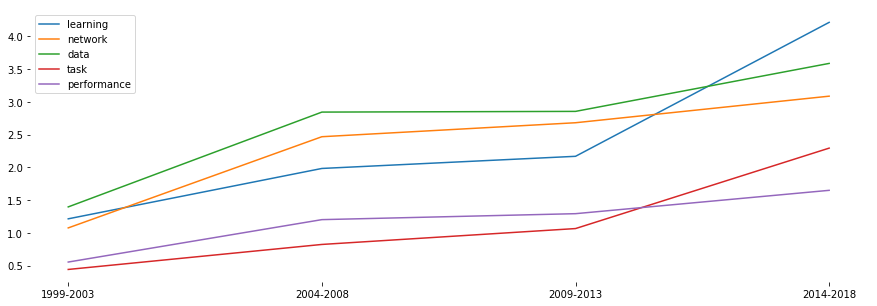

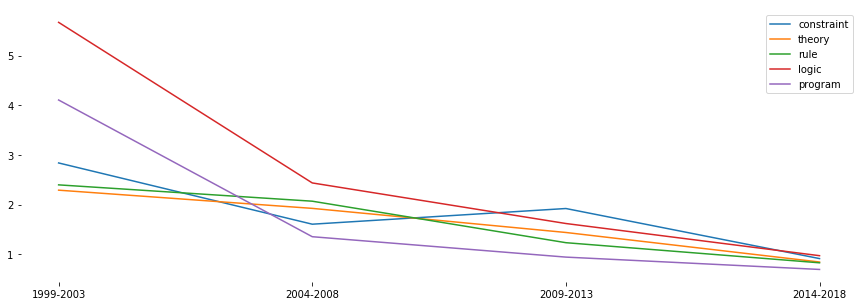

In [12]:
# gains cleaned
words_up = ['network','learning','task','performance','data']
words_down = ['program','logic','rule','theory','constraint']

plot_best(select_best(words_up,calculate_five_year(word_freq_per_1000)))
plot_best(select_best(words_down,calculate_five_year(word_freq_per_1000)))

Text(66.4531,0.5,'')

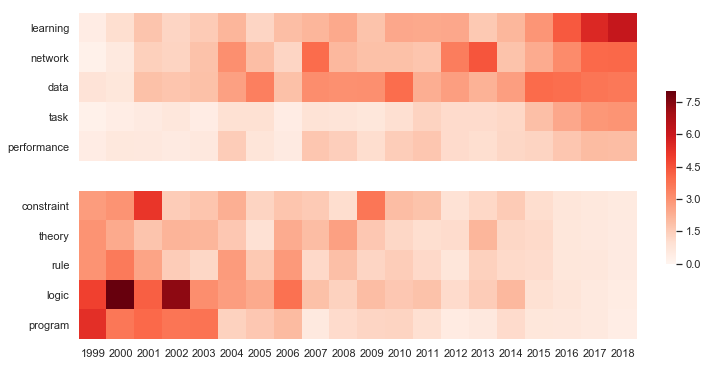

In [13]:
sns.set(style='white')

words_up = ['network','learning','task','performance','data']
words_down = ['program','logic','rule','theory','constraint']

gains = select_best(words_up,word_freq_per_1000)
losses = select_best(words_down,word_freq_per_1000)

fig,ax = plt.subplots(2,1,figsize=(10,6),sharex=True)
cbar_ax = fig.add_axes([.94, .3, .015, .4])
sns.heatmap(gains,ax=ax[0],vmin=0,vmax=8,cbar_ax=cbar_ax,cmap="Reds")
sns.heatmap(losses,ax=ax[1],vmin=0,vmax=8,cbar_ax=cbar_ax,cmap="Reds")

#remove y label
ax[0].set_ylabel('')
ax[1].set_ylabel('')

Text(66.4531,0.5,'')

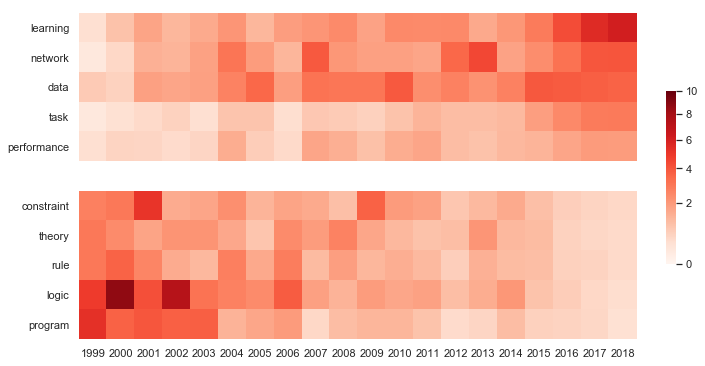

In [14]:
# power normalized
from matplotlib.colors import PowerNorm

sns.set(style='white')

# normalize colorbar
power_norm = PowerNorm(gamma=0.65)

# plot
fig,ax = plt.subplots(2,1,figsize=(10,6),sharex=True)
cbar_ax = fig.add_axes([.94, .3, .015, .4])
hm1 = sns.heatmap(gains,ax=ax[0],vmin=0,vmax=10,norm=power_norm,cbar_ax=cbar_ax,cmap="Reds")
hm2 = sns.heatmap(losses,ax=ax[1],vmin=0,vmax=10,norm=power_norm,cbar_ax=cbar_ax,cmap="Reds")
# fig.colorbar(hm1,ax=cbar_ax, extend='max')

# remove y label
ax[0].set_ylabel('')
ax[1].set_ylabel('')

#### bigrams

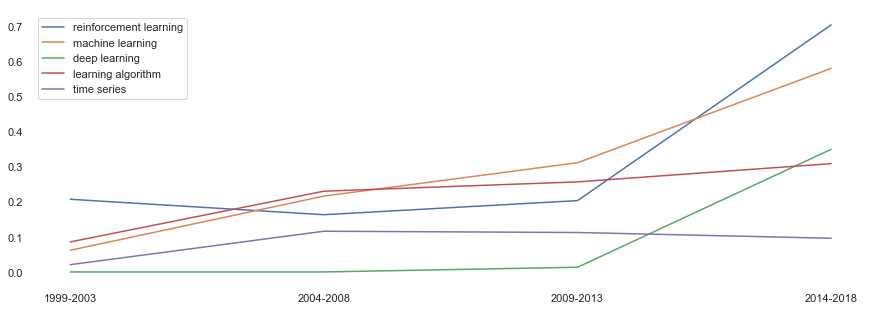

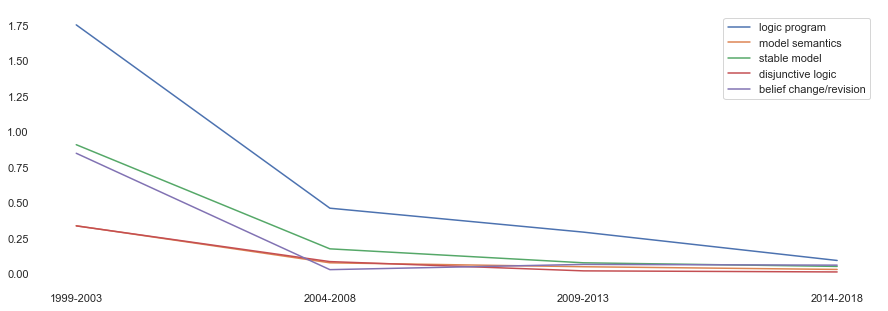

In [44]:
# bigrams cleaned
bigrams_up = ['deep learning', 'reinforcement learning',
              'machine learning', 'learning algorithm','time series']
bigrams_down = ['logic program', 'model semantics','belief change/revision',
                'stable model', 'disjunctive logic',]

bigram_five_year = calculate_five_year(bigram_freq_per_1000)
bigram_five_year.set_index('index',inplace=True)
bigram_five_year.loc['belief change/revision'] = bigram_five_year.loc['belief change']+bigram_five_year.loc['belief revision']
bigram_five_year.reset_index(inplace=True)

plot_best(select_best(bigrams_up,bigram_five_year))
plot_best(select_best(bigrams_down,bigram_five_year))



Text(66.4531,0.5,'')

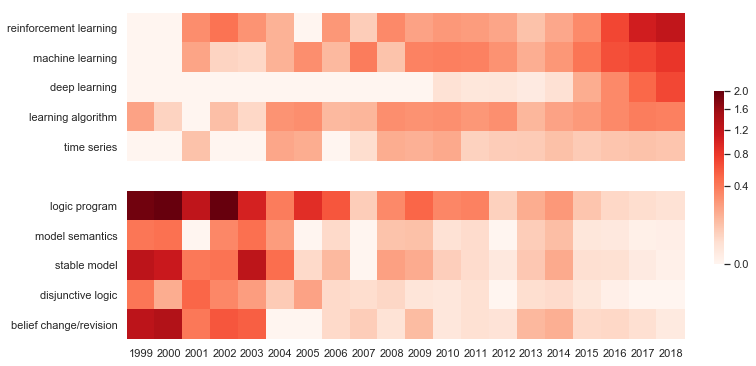

In [51]:
sns.set(style='white')

bigrams_up = ['deep learning', 'reinforcement learning',
              'machine learning', 'learning algorithm','time series']
bigrams_down = ['logic program', 'stable model','belief change/revision',
                 'model semantics','disjunctive logic',]

bigram_freq_tweaked = bigram_freq_per_1000.copy()
bigram_freq_tweaked.set_index('index',inplace=True)
bigram_freq_tweaked.loc['belief change/revision'] = bigram_freq_tweaked.loc['belief change']+bigram_freq_tweaked.loc['belief revision']
bigram_freq_tweaked.reset_index(inplace=True)

gains = select_best(bigrams_up,bigram_freq_tweaked)
losses = select_best(bigrams_down,bigram_freq_tweaked)

# normalize colorbar
power_norm = PowerNorm(gamma=0.5)

# plot
fig,ax = plt.subplots(2,1,figsize=(10,6),sharex=True)
cbar_ax = fig.add_axes([.94, .3, .015, .4])
sns.heatmap(gains,ax=ax[0],vmin=0,vmax=2,norm=power_norm, cbar_ax=cbar_ax,cmap="Reds")
sns.heatmap(losses,ax=ax[1],vmin=0,vmax=2,norm=power_norm, cbar_ax=cbar_ax,cmap="Reds")

#remove y label
ax[0].set_ylabel('')
ax[1].set_ylabel('')